Para identificar las características más importantes que diferencian a los pacientes con complicaciones infecciosas después de una biopsia prostática y que requieren hospitalización (casos) de aquellos que no presentan complicaciones (controles), puedes realizar un análisis de características y utilizar métodos de aprendizaje automático. 

# EDA (Exploratory Data Analysis)

In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

### 1. Importar los datos

In [3]:
# Leer los datos e importar en dataframe
df_hospital = pd.read_csv('ETL_BBDD_Hospitalización.csv')

### 2. Revisar la estructura del dataframe

In [4]:
# Dimensionar filas y columnas
df_hospital.shape

(568, 20)

In [5]:
# Revisar columnas (tipos de datos y nulos)
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           568 non-null    object 
 5   VOLUMEN PROSTATICO                                                         568 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [6]:
# Revisar el tipo de datos contenidoo dentro de cada columna
# se crea funcion para usar como verificacion mas adelante

def verificar_tipo_datos(df):

    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))

    df_info = pd.DataFrame(mi_dict)
    
    for columna in df.columns:
        print(columna, " (nulos) = ", df[columna].isnull().sum())

    return df_info

In [7]:
verificar_tipo_datos(df_hospital)

EDAD  (nulos) =  0
DIABETES  (nulos) =  0
HOSPITALIZACIÓN ULTIMO MES  (nulos) =  0
PSA  (nulos) =  4
BIOPSIAS PREVIAS  (nulos) =  0
VOLUMEN PROSTATICO  (nulos) =  0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  (nulos) =  0
NUMERO DE MUESTRAS TOMADAS  (nulos) =  0
CUP  (nulos) =  0
ENF. CRONICA PULMONAR OBSTRUCTIVA  (nulos) =  0
BIOPSIA  (nulos) =  0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  (nulos) =  0
FIEBRE  (nulos) =  0
ITU  (nulos) =  0
TIPO DE CULTIVO  (nulos) =  0
AGENTE AISLADO  (nulos) =  0
PATRON DE RESISTENCIA  (nulos) =  0
HOSPITALIZACION  (nulos) =  0
DIAS HOSPITALIZACION MQ  (nulos) =  0
DIAS HOSPITALIZACIÓN UPC  (nulos) =  0


,nombre_campo,tipo_datos,no_nulos_%,nulos_%
0,EDAD,[<class 'float'>],100.0,0.0
1,DIABETES,[<class 'str'>],100.0,0.0
2,HOSPITALIZACIÓN ULTIMO MES,[<class 'str'>],100.0,0.0
3,PSA,[<class 'float'>],99.3,0.7
4,BIOPSIAS PREVIAS,[<class 'str'>],100.0,0.0
5,VOLUMEN PROSTATICO,[<class 'str'>],100.0,0.0
6,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,[<class 'str'>],100.0,0.0
7,NUMERO DE MUESTRAS TOMADAS,[<class 'float'>],100.0,0.0
8,CUP,[<class 'str'>],100.0,0.0
9,ENF. CRONICA PULMONAR OBSTRUCTIVA,[<class 'str'>],100.0,0.0


In [11]:
df_hospital.head(5)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [12]:
def verificar_datos_unicos(df):

    columnas_df = df.columns.tolist()
    tipos_datos = [float, int, str]

    for columna in columnas_df:
        for tipo in tipos_datos:
            filtro = df[columna][df[columna].apply(lambda x: isinstance(x, tipo))]
            valores_unicos = filtro.unique()
            print(columna, " (", tipo.__name__, ") ", len(valores_unicos),": ", valores_unicos)
        print("")

In [13]:
verificar_datos_unicos(df_hospital)

EDAD  ( float )  45 :  [ 53.  56.  57.  55.  67.  69.  44.  54.  68.  43.  65.  62.  71.  64.
  77.  75.  73.  63.  66.  84.  42.  61.  47.  48.  49.  81.  52.  74.
  70.  58.  59.  60.  50. 143. 151.  76.  78.  46.  51.  79.  39.  72.
  80.  45.  82.]
EDAD  ( int )  0 :  []
EDAD  ( str )  0 :  []

DIABETES  ( float )  0 :  []
DIABETES  ( int )  0 :  []
DIABETES  ( str )  2 :  ['NO' 'SI']

HOSPITALIZACIÓN ULTIMO MES  ( float )  0 :  []
HOSPITALIZACIÓN ULTIMO MES  ( int )  0 :  []
HOSPITALIZACIÓN ULTIMO MES  ( str )  2 :  ['NO' 'SI']

PSA  ( float )  147 :  [  4.     7.7   29.     7.     6.2    6.      nan   5.7    4.3    5.19
   4.5   14.    10.     9.    25.    91.8   21.    98.     7.5   10.8
  10.5   90.     5.1   16.    17.    23.     6.4  100.     5.8   38.9
  20.    40.     9.5    9.6   10.2    8.5   53.    19.     5.6    3.5
  15.     5.2   17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7
  18.    27.     5.     8.39   4.79   6.8    4.9    7.8   16.2    8.3
   6.5    7.2   

In [18]:
df_hospital[df_hospital["BIOPSIA"] == "NEG"][df_hospital["HOSPITALIZACION"] == "SI"]

C:\Users\Ivan Rojas\AppData\Local\Temp\ipykernel_6760\1246328149.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hospital[df_hospital["BIOPSIA"] == "NEG"][df_hospital["HOSPITALIZACION"] == "SI"]


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
5,55.0,SI,SI,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3.0,0.0
6,53.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3.0,0.0
7,67.0,NO,NO,6.20,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2.0,0.0
8,69.0,NO,NO,6.00,NO,NO,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4.0,0.0
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0


In [20]:
df_hospital[df_hospital["HOSPITALIZACION"] == "NO"][df_hospital["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"] != "NO"]

C:\Users\Ivan Rojas\AppData\Local\Temp\ipykernel_6760\2907394632.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hospital[df_hospital["HOSPITALIZACION"] == "NO"][df_hospital["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"] != "NO"]


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
24,77.0,NO,NO,10.0,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,9,SI,NO,NO,NO,NO,NO,0.0,0.0
25,75.0,NO,NO,9.0,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,9,SI,NO,NO,NO,NO,NO,0.0,0.0


### 3. Eliminar registros que no serán necesarios

## Tratamiento formato datos de columnas

In [14]:
# Correcion de la palabra "aminoglucocido" en la columna 
nombre_col = "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"
df_hospital[nombre_col] = df_hospital[nombre_col].str.replace('AMINOGLICOSIDO', 'AMINOGLUCOSIDO')
df_hospital[nombre_col] = df_hospital[nombre_col].str.replace('AMINOGLICÓSIDO', 'AMINOGLUCOSIDO')

In [15]:
verificar_datos_unicos(df_hospital)

EDAD  ( float )  45 :  [ 53.  56.  57.  55.  67.  69.  44.  54.  68.  43.  65.  62.  71.  64.
  77.  75.  73.  63.  66.  84.  42.  61.  47.  48.  49.  81.  52.  74.
  70.  58.  59.  60.  50. 143. 151.  76.  78.  46.  51.  79.  39.  72.
  80.  45.  82.]
EDAD  ( int )  0 :  []
EDAD  ( str )  0 :  []

DIABETES  ( float )  0 :  []
DIABETES  ( int )  0 :  []
DIABETES  ( str )  2 :  ['NO' 'SI']

HOSPITALIZACIÓN ULTIMO MES  ( float )  0 :  []
HOSPITALIZACIÓN ULTIMO MES  ( int )  0 :  []
HOSPITALIZACIÓN ULTIMO MES  ( str )  2 :  ['NO' 'SI']

PSA  ( float )  147 :  [  4.     7.7   29.     7.     6.2    6.      nan   5.7    4.3    5.19
   4.5   14.    10.     9.    25.    91.8   21.    98.     7.5   10.8
  10.5   90.     5.1   16.    17.    23.     6.4  100.     5.8   38.9
  20.    40.     9.5    9.6   10.2    8.5   53.    19.     5.6    3.5
  15.     5.2   17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7
  18.    27.     5.     8.39   4.79   6.8    4.9    7.8   16.2    8.3
   6.5    7.2   

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
correlation_matrix = df_hospital.corr()

ValueError: could not convert string to float: 'NO'

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

## Analisis de contenido de columnas

In [ ]:
# Porcentaje de cada valor para la columna "early_access del dataframe

conteo_valores = df_steam_games["early_access"].value_counts()

porcentaje_true = (conteo_valores[True] / len(df_steam_games)) * 100
porcentaje_false = (conteo_valores[False] / len(df_steam_games)) * 100

print("Conteo True = ", conteo_valores[True], "\t\tPorcentaje True = {:.2f}%".format(porcentaje_true))
print("Conteo False = ", conteo_valores[False], "\t\tPorcentaje False = {:.2f}%".format(porcentaje_false))


Conteo True =  1446 		Porcentaje True = 4.83%
Conteo False =  28513 		Porcentaje False = 95.17%


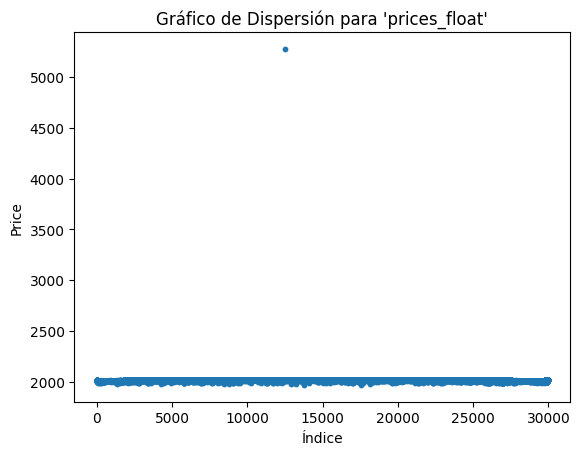

In [ ]:
# Gráfico dispersion columna "release_year" para verificar outliers

def graficar_years_outliers (df):
    
    plt.scatter(range(len(df["release_year"])), df["release_year"], marker='o', s=10)

    # Etiquetas para los ejes
    plt.xlabel("Índice")
    plt.ylabel("Price")
    plt.title("Gráfico de Dispersión para 'prices_float'")

    return plt.show()

graficar_years_outliers(df_steam_games)


In [ ]:
# Ordenar de manera ascendente para encontrar outliers

np.array(sorted(df_steam_games["release_year"].dropna().unique()))

array([1970., 1975., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2021., 5275.])

In [ ]:
# Corregir el registro 5275 pues no es un año válido y sustituirlo por un NaN 

valor_buscado = 5275
list_indices = df_steam_games.loc[df_steam_games["release_year"] == valor_buscado].index.tolist()     # lista de indices donde se encuentra el valor

if list_indices != []:
    for indice in list_indices:
        df_steam_games.at[indice, 'release_year'] = pd.NA      # reemplazar el valor

# elimina los valores nulos de la columna
df_steam_games = df_steam_games.dropna(subset=["release_year"])

np.array(sorted(df_steam_games["release_year"].dropna().unique()))     # comprobar

array([1970., 1975., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2021.])

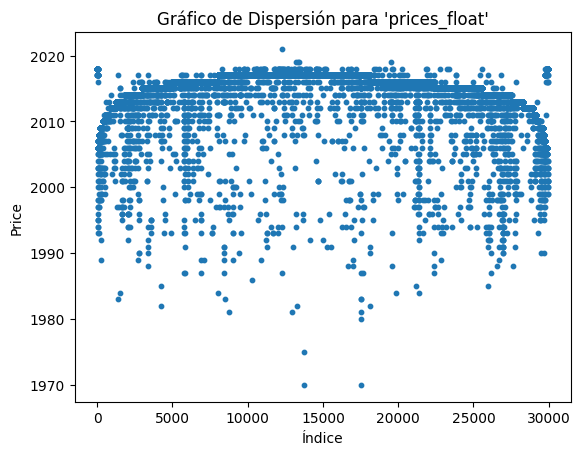

In [ ]:
# verificar outliers
graficar_years_outliers(df_steam_games)

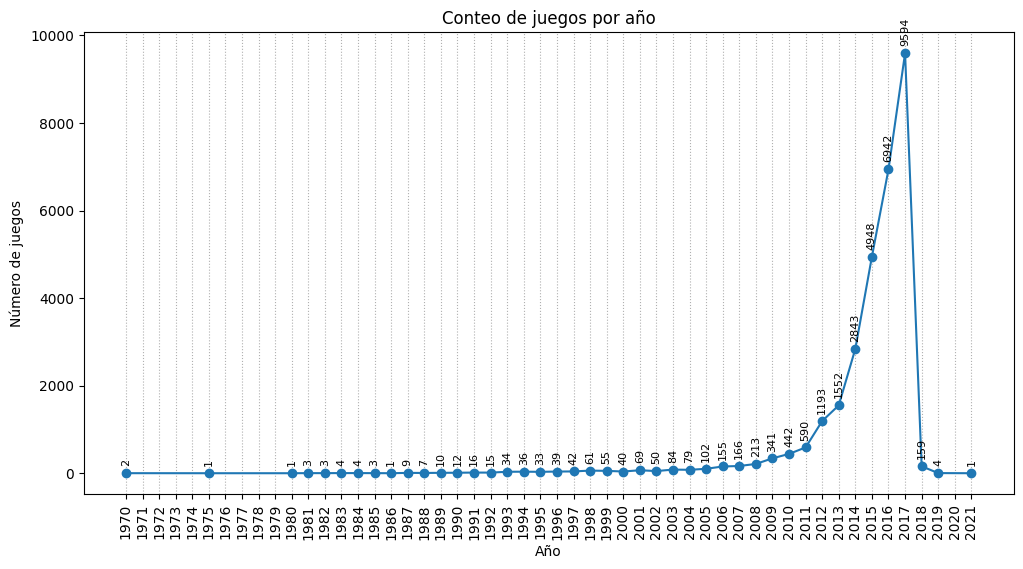

In [ ]:
# Gráfica descriptiva "release_year" (conteo de juegos por año para ver distribucion de registros)
conteo_valores = df_steam_games["release_year"].value_counts()

# Ordenar los valores por el índice (los años) para tener el gráfico en orden cronológico
conteo_valores = conteo_valores.sort_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))  # Ancho: 12 pulgadas, Alto: 6 pulgadas
plt.plot(conteo_valores.index, conteo_valores.values, marker='o', linestyle='-')

# Etiquetas para los ejes
plt.xlabel("Año")
plt.ylabel("Número de juegos")

# Título del gráfico
plt.title("Conteo de juegos por año")

# Agregar etiquetas a cada punto con rotación vertical y distancia ajustada
for x, y in zip(conteo_valores.index, conteo_valores.values):
    plt.annotate(text=str(y), xy=(x, y), xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=8, rotation='vertical')

# Agregar guías del eje x
plt.grid(axis='x', linestyle='dotted')

# Ampliar el rango de años del eje x hasta el año 2025
plt.xticks(range(int(min(conteo_valores.index)), int(max(conteo_valores.index))+1), rotation='vertical')

# Mostrar el gráfico
plt.show()

In [ ]:
verificar_tipo_datos(df_steam_games)

genres  =  0
app_name  =  0
specs  =  0
price  =  0
early_access  =  0
sentiment  =  0
metascore  =  0
release_year  =  0


,nombre_campo,tipo_datos,no_nulos_%,nulos_%
0,genres,[<class 'list'>],100.0,0.0
1,app_name,[<class 'str'>],100.0,0.0
2,specs,[<class 'list'>],100.0,0.0
3,price,[<class 'float'>],100.0,0.0
4,early_access,[<class 'bool'>],100.0,0.0
5,sentiment,[<class 'str'>],100.0,0.0
6,metascore,[<class 'int'>],100.0,0.0
7,release_year,[<class 'float'>],100.0,0.0


In [ ]:
df_steam_games.head(5)

,genres,app_name,specs,price,early_access,sentiment,metascore,release_year
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,[Single-player],4.99,False,sin_dato,0,2018.0
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,Mostly Positive,0,2018.0
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,Mostly Positive,0,2017.0
3,"[Action, Adventure, Casual]",弹炸人2222,[Single-player],0.99,False,sin_dato,0,2017.0
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,"[Single-player, Steam Achievements]",3.99,False,Mixed,0,2018.0


## Exportar datos formato CSV

In [ ]:
df_steam_games.to_csv('EDA_steam_games.csv', index=False)